# Parte 1: Análisis de la Base de Datos

**Selección de la Base de Datos**

Elegí una base de datos de Kaggle, https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset, con la cual podremos analizar si un hongo que encontramos en la naturaleza es comestible o no.

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('secondary_data.csv', delimiter=';')
df = pd.DataFrame(data)

df


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


**1. Describiendo cada columna del conjunto de datos:**
<ol>
<li>class = si el hongo es comestible o no, variable categorica</li>
<li>cap-diameter = diametro de la tapa/sombrero, variable continua</li>
<li>cap-shape = forma de la tapa/sombrero, variable categorica</li>
<li>cap-surface = superficie de la tapa/sombrero, variable categorica</li>
<li>cap-color = color de la tapa/sombrero, variable categorica</li>
<li>does-bruise-or-bleed = ¿tiene moretones o sangra?, variable categorica</li>
<li>gill-attachment = fijacion de las laminas que se encuentran debajo del sombrero, variable categorica</li>
<li>gill-spacing = espacio entre las branquias, variable categorica</li>
<li>gill-color = color de las laminas, variable categorica</li>
<li>stem-height	 = altura del tallo, variable continua</li>
<li>stem-width = ancho del tallo, variable continua</li>
<li>stem-root	 = forma de tallo y raiz, variable continua</li>
<li>stem-surface = superficie del tallo, variable continua</li>
<li>stem-color = color del tallo, variable categorica</li>
<li>veil-type = tipo de velo, variable categorica</li>
<li>veil-color = color del velo, variable categorica</li>
<li>has-ring = ¿tiene anillo?, variable categorica</li>
<li>ring-type = tipo de anillo, variable categorica</li>
<li>spore-print-color = impresion de esporas en color, variable categorica</li>
<li>habitat = habitat en el que se encontro el hongo, variable categorica</li>
<li>season = estacion del año en la que se encontro el hongo, variable categorica</li>
</ol>

In [8]:
df_class = {
    'p' : 0,
    'e' : 1
}

##df_cap_diameter = (df.iloc[:, 1].values / 100)

df_cap_shape = {
    'b': 0,
    'c': 1,
    'x': 2,
    'f': 3,
    's': 4,
    'p': 5,
    'o': 6
}


df_cap_surface = {
    'i': 0,
    'g': 1,
    'y': 2,
    's': 3,
    'h': 4,
    'l': 5,
    'k': 6,
    't': 7,
    'w': 8,
    'e': 9
}

df_cap_color = {
    'n': 0,
    'b': 1,
    'g': 2,
    'r': 3,
    'p': 4,
    'u': 5,
    'e': 6,
    'w': 7,
    'y': 8,
    'l': 9,
    'o': 10,
    'k': 11
}

df_does_bruise_bleed = {
    'f': 0,  
    't': 1
}

df_gill_attachment = {
    'f': 0,
    'x': 1,
    'd': 2,
    'e': 3,
    's': 4,
    'p': 5,
    'a': 6,
    '?': 7
}

df_gill_spacing = {
    'f': 0,  
    'c': 1,
    'd': 2  
}

df_gill_color = {
    'n': 0,
    'b': 1,
    'g': 2,
    'r': 3,
    'p': 4,
    'u': 5,
    'e': 6,
    'w': 7,
    'y': 8,
    'l': 9,
    'o': 10,
    'k': 11,
    'f': 12
}

#df_stem_height
#df_stem_width

df_stem_root = {
    'b': 0,
    's': 1,
    'c': 2,
    'u': 3,
    'e': 4,
    'z': 5,
    'r': 9
}

df_stem_surface = {
    'i': 0,
    'g': 1,
    'y': 2,
    's': 3,
    'h': 4,
    'l': 5,
    'k': 6,
    't': 7,
    'w': 8,
    'e': 9,
    'f': 10
}

df_stem_color = {
    'n': 0,
    'b': 1,
    'g': 2,
    'r': 3,
    'p': 4,
    'u': 5,
    'e': 6,
    'w': 7,
    'y': 8,
    'l': 9,
    'o': 10,
    'k': 11,
    'f': 12
}

df_veil_type = {
    'p': 0,  
    'u': 1
}

df_veil_color = {
    'n': 0,
    'b': 1,
    'g': 2,
    'r': 3,
    'p': 4,
    'u': 5,
    'e': 6,
    'w': 7,
    'y': 8,
    'l': 9,
    'o': 10,
    'k': 11,
    'f': 12
}

df_has_ring = {
    'f': 0,  
    't': 1
}

df_ring_type = {
    'f': 0,
    'c': 1,
    'e': 2,
    'r': 3,
    'g': 4,
    'l': 5,
    'p': 6,
    's': 7,
    'z': 8,
    'y': 9,
    'm': 10,
    '?': 11
}

df_spore_print_color = {
    'n': 0,
    'b': 1,
    'g': 2,
    'r': 3,
    'p': 4,
    'u': 5,
    'e': 6,
    'w': 7,
    'y': 8,
    'l': 9,
    'o': 10,
    'k': 11
}

df_habitat= {
    'g': 0,
    'l': 1,
    'm': 2,
    'p': 3,
    'h': 4,
    'u': 5,
    'w': 6,
    'd': 7
}

df_season= {
    's': 0,
    'u': 1,
    'a': 2,
    'w': 3
}


In [9]:
reemplazo = {
    'class': df_class,
    'cap-shape':  df_cap_shape,
    'cap-surface': df_cap_surface,
    'cap-color': df_cap_color,
    'does-bruise-or-bleed': df_does_bruise_bleed,
    'gill-attachment': df_gill_attachment,
    'gill-spacing': df_gill_spacing,
    'gill-color': df_gill_color,
    'stem-root': df_stem_root,
    'stem-surface': df_stem_surface,
    'stem-color':  df_stem_color,
    'veil-type':  df_veil_type,
    'veil-color': df_veil_color,
    'has-ring':  df_has_ring,
    'ring-type': df_ring_type,
    'spore-print-color': df_spore_print_color,
    'habitat':  df_habitat,
    'season': df_season 
}

for col, rep in reemplazo.items():
    if col in df.columns:
        df[col] = df[col].replace(rep)
    
df

C:\Users\Micaela\AppData\Local\Temp\ipykernel_14368\343349343.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,2,1,10,0,3.0,NaN,7,16.95,...,1,2.0,7,1.0,7.0,1,4.0,NaN,7,3
1,0,16.60,2,1,10,0,3.0,NaN,7,17.99,...,1,2.0,7,1.0,7.0,1,4.0,NaN,7,1
2,0,14.07,2,1,10,0,3.0,NaN,7,17.80,...,1,2.0,7,1.0,7.0,1,4.0,NaN,7,3
3,0,14.17,3,4,6,0,3.0,NaN,7,15.77,...,1,2.0,7,1.0,7.0,1,6.0,NaN,7,3
4,0,14.64,2,4,10,0,3.0,NaN,7,16.53,...,1,2.0,7,1.0,7.0,1,6.0,NaN,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,4,3,8,0,0.0,0.0,12,3.93,...,NaN,NaN,8,NaN,NaN,0,0.0,NaN,7,2
61065,0,1.27,3,3,8,0,0.0,0.0,12,3.18,...,NaN,NaN,8,NaN,NaN,0,0.0,NaN,7,2
61066,0,1.27,4,3,8,0,0.0,0.0,12,3.86,...,NaN,NaN,8,NaN,NaN,0,0.0,NaN,7,1
61067,0,1.24,3,3,8,0,0.0,0.0,12,3.56,...,NaN,NaN,8,NaN,NaN,0,0.0,NaN,7,1


In [ ]:
# df_cap_diameter = {
#     (0, 6.234):  0,
#     (6.234, 12.468): 1,
# }

In [10]:
df_sinNAS =df.fillna(value=-1)

df_sinNAS


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,2,1,10,0,3.0,-1.0,7,16.95,...,1,2.0,7,1.0,7.0,1,4.0,-1.0,7,3
1,0,16.60,2,1,10,0,3.0,-1.0,7,17.99,...,1,2.0,7,1.0,7.0,1,4.0,-1.0,7,1
2,0,14.07,2,1,10,0,3.0,-1.0,7,17.80,...,1,2.0,7,1.0,7.0,1,4.0,-1.0,7,3
3,0,14.17,3,4,6,0,3.0,-1.0,7,15.77,...,1,2.0,7,1.0,7.0,1,6.0,-1.0,7,3
4,0,14.64,2,4,10,0,3.0,-1.0,7,16.53,...,1,2.0,7,1.0,7.0,1,6.0,-1.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,4,3,8,0,0.0,0.0,12,3.93,...,-1,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,2
61065,0,1.27,3,3,8,0,0.0,0.0,12,3.18,...,-1,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,2
61066,0,1.27,4,3,8,0,0.0,0.0,12,3.86,...,-1,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,1
61067,0,1.24,3,3,8,0,0.0,0.0,12,3.56,...,-1,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,1


**Normalizando los datos**

In [11]:
# df_cap_diameter = (df.iloc[:, 0].values / 1891)
# df_cap_shape = (df.iloc[:, 1].values / 6)
# df_gill_attachment = (df.iloc[:, 2].values / 6)
# df_gill_color = (df.iloc[:, 3].values / 11)
# df_stem_height = ((df.iloc[:, 4].values - 0.000426)/3.8348936773222433)
# df_stem_width = (df.iloc[:, 5].values / 3569)
# df_stem_color = (df.iloc[:, 6].values / 12)
# df_season = ((df.iloc[:, 7].values -  0.027372)/1.776900708628173)

In [12]:
# df['cap-diameter'] = df_cap_diameter
# df['cap-shape'] = df_cap_shape
# df['gill-attachment'] = df_gill_attachment
# df['gill-color'] = df_gill_color
# df['stem-height'] = df_stem_height
# df['stem-width'] = df_stem_width
# df['stem-color'] = df_stem_color
# df['season'] = df_season

# df


**2. Análisis de Correlaciones:**

In [13]:
df_sinNAS = df_sinNAS.drop(columns=['cap-surface','does-bruise-or-bleed', 'stem-root'])

df_sinNAS



,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,2,10,3.0,-1.0,7,16.95,17.09,2.0,7,1.0,7.0,1,4.0,-1.0,7,3
1,0,16.60,2,10,3.0,-1.0,7,17.99,18.19,2.0,7,1.0,7.0,1,4.0,-1.0,7,1
2,0,14.07,2,10,3.0,-1.0,7,17.80,17.74,2.0,7,1.0,7.0,1,4.0,-1.0,7,3
3,0,14.17,3,6,3.0,-1.0,7,15.77,15.98,2.0,7,1.0,7.0,1,6.0,-1.0,7,3
4,0,14.64,2,10,3.0,-1.0,7,16.53,17.20,2.0,7,1.0,7.0,1,6.0,-1.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,4,8,0.0,0.0,12,3.93,6.22,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,2
61065,0,1.27,3,8,0.0,0.0,12,3.18,5.43,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,2
61066,0,1.27,4,8,0.0,0.0,12,3.86,6.37,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,1
61067,0,1.24,3,8,0.0,0.0,12,3.56,5.44,-1.0,8,-1.0,-1.0,0,0.0,-1.0,7,1


In [14]:
df_stats = df_sinNAS.describe().T                          # Estadisticas descriptivas (ED) del DataFrame (DF) traspuestas para facilitar la normalización
df_n = (df_sinNAS - df_stats['mean']) / df_stats['std']    # Normalizo el DF, a cada valor le resto la media y lo divido por la desviación estándar
df_n.describe()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04
mean,-7.818774e-17,5.212516e-17,1.042503e-16,-1.284513e-16,2.196703e-16,2.233935e-17,1.265897e-16,2.382865e-16,-1.340361e-16,-5.212516e-17,-1.042503e-16,1.377594e-16,-2.978581e-17,2.978581e-17,-1.005271e-16,3.723226e-18,8.191097e-17,1.489290e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.955837e-01,-1.206846e+00,-1.819267e+00,-1.028637e+00,-1.500601e+00,-1.111446e+00,-1.634760e+00,-1.952969e+00,-1.210588e+00,-5.992436e-01,-1.370218e+00,-2.342587e-01,-3.567510e-01,-5.751207e-01,-8.541884e-01,-2.920591e-01,-2.001014e+00,-2.300908e+00
25%,-8.955837e-01,-6.180342e-01,-4.156017e-01,-1.028637e+00,-6.853728e-01,-1.111446e+00,-7.849230e-01,-5.761212e-01,-6.914549e-01,-5.992436e-01,-1.370218e+00,-2.342587e-01,-3.567510e-01,-5.751207e-01,-3.703960e-01,-2.920591e-01,-5.209151e-01,-8.823325e-01
50%,-8.955837e-01,-1.659792e-01,-4.156017e-01,-2.269460e-01,-2.777588e-01,6.689256e-01,3.481924e-01,-1.873991e-01,-1.952390e-01,-5.992436e-01,5.814713e-01,-2.342587e-01,-3.567510e-01,-5.751207e-01,-3.703960e-01,-2.920591e-01,5.891590e-01,5.362428e-01
75%,1.116572e+00,3.430577e-01,2.862311e-01,8.419751e-01,9.450834e-01,6.689256e-01,6.314712e-01,3.437555e-01,4.404753e-01,5.763298e-01,5.814713e-01,-2.342587e-01,-3.567510e-01,-5.751207e-01,-3.703960e-01,-2.920591e-01,5.891590e-01,5.362428e-01
max,1.116572e+00,1.056178e+01,2.391730e+00,1.910896e+00,1.352697e+00,1.559111e+00,1.764587e+00,8.112263e+00,9.143185e+00,3.711192e+00,1.975535e+00,4.268715e+00,4.255679e+00,1.738737e+00,4.467528e+00,4.432540e+00,5.891590e-01,1.954818e+00


In [15]:
print("Matriz de Correlación:")
df_n.corr()

Matriz de Correlación:


,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,1.000000,0.181139,0.039482,-0.115052,0.067787,0.050333,0.047515,0.121593,0.197368,-0.097342,0.000925,-0.052677,0.009056,-0.057559,-0.063731,-0.096710,0.053901,0.033552
cap-diameter,0.181139,1.000000,0.249009,0.021456,0.116258,-0.106200,0.082676,0.422560,0.695330,-0.023417,-0.026169,0.082387,0.054968,0.077024,0.081638,-0.077460,0.208363,0.006751
cap-shape,0.039482,0.249009,1.000000,0.016985,-0.149327,-0.003852,0.252245,-0.102510,0.254313,0.160338,0.053511,-0.098912,-0.145618,-0.028759,-0.050028,-0.144753,0.129781,-0.009747
cap-color,-0.115052,0.021456,0.016985,1.000000,0.033288,0.050096,0.158439,-0.083471,-0.040792,-0.142231,0.288742,-0.000021,-0.003434,-0.022203,-0.028163,-0.013985,-0.040598,0.001012
gill-attachment,0.067787,0.116258,-0.149327,0.033288,1.000000,-0.074672,-0.144644,0.052686,0.060431,0.103035,-0.080924,-0.096898,-0.005087,-0.023945,0.000029,-0.012200,-0.018505,0.006124
gill-spacing,0.050333,-0.106200,-0.003852,0.050096,-0.074672,1.000000,-0.031254,-0.220680,-0.124753,0.008846,0.029649,-0.121345,-0.155220,-0.091534,-0.109029,-0.030726,-0.041564,0.045015
gill-color,0.047515,0.082676,0.252245,0.158439,-0.144644,-0.031254,1.000000,-0.007328,0.178172,-0.021747,0.206337,0.082968,0.007696,-0.082054,-0.100080,0.031091,0.023987,-0.014746
stem-height,0.121593,0.422560,-0.102510,-0.083471,0.052686,-0.220680,-0.007328,1.000000,0.436117,-0.139690,-0.070987,0.298777,0.263239,0.281049,0.333766,0.049463,0.058579,0.012380
stem-width,0.197368,0.695330,0.254313,-0.040792,0.060431,-0.124753,0.178172,0.436117,1.000000,-0.199724,-0.094491,0.039588,0.030092,-0.000981,0.010105,-0.084928,0.219764,0.039377
stem-surface,-0.097342,-0.023417,0.160338,-0.142231,0.103035,0.008846,-0.021747,-0.139690,-0.199724,1.000000,0.088275,-0.007784,-0.084930,0.082651,0.022688,-0.033469,0.038055,-0.070023


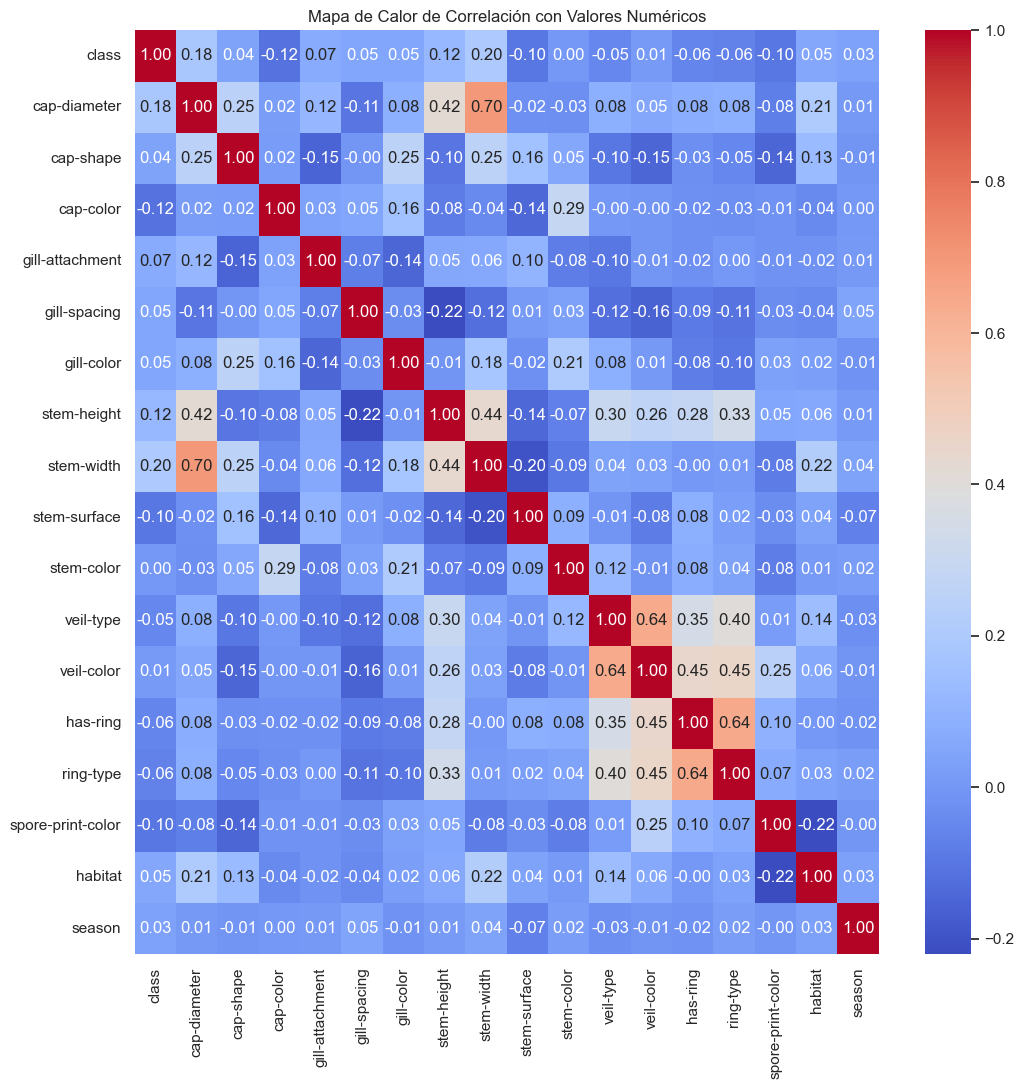

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df_sinNAS.corr()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Configurar el diseño del gráfico
plt.figure(figsize=(12, 12))

# Crear el mapa de calor de correlación con los valores numéricos
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm')

# Añadir el título
plt.title('Mapa de Calor de Correlación con Valores Numéricos')

# Mostrar el gráfico
plt.show()

#### Deteccion de Valores Atípicos y Mediana

**Media y Desviación Estándar:** ('mean' y 'std') La media de todas las columnas es muy cercana a cero y la desviación estándar es aproximadamente uno ya que los datos han sido centrados en cero y escalados para tener una desviación estándar de uno.
 
**Mínimo y Máximo:** ('min' y 'max') Los valores mínimos y máximos varían entre 0 y 1 en todas las columnas luego de haber normalizado los datos


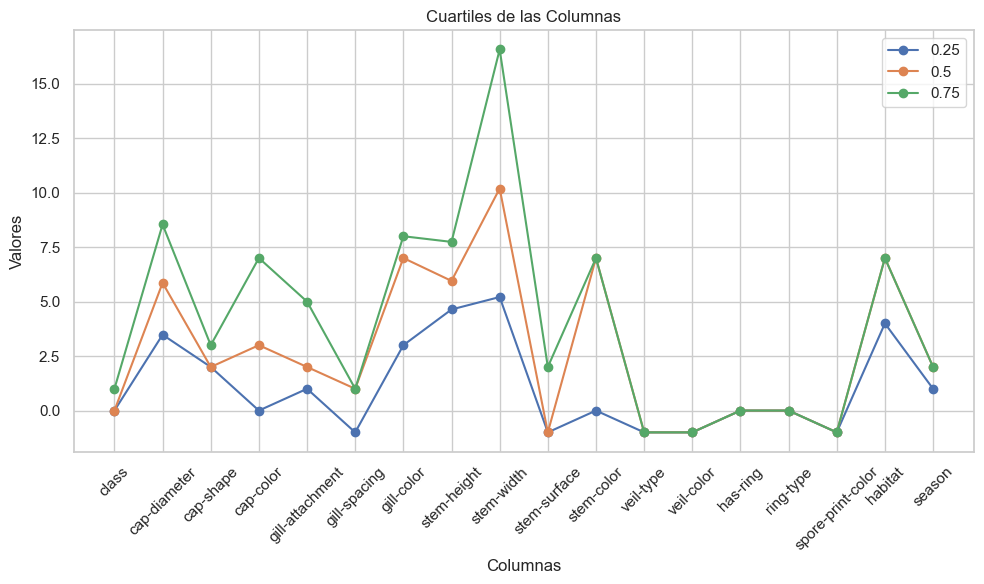

In [17]:
import matplotlib.pyplot as plt

# Obtener nombres de todas las columnas excepto la última
columnas = df_sinNAS.columns

# Configurar el diseño del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular los cuartiles para cada columna
quartiles = df_sinNAS.quantile([0.25, 0.5, 0.75])

# Transponer los datos para que cada fila represente un cuartil
quartiles = quartiles.T

# Graficar los cuartiles
for q in quartiles.columns:
    ax.plot(columnas, quartiles[q], marker='o', label=q)

# Añadir las etiquetas de los ejes y el título
ax.set_xlabel('Columnas')
ax.set_ylabel('Valores')
ax.set_title('Cuartiles de las Columnas')
ax.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Considero tener datos atípicos en mi Base de Datos, por ende pasaremos a eliminarlos

In [18]:
df_sinNAS.min()


class                0.00
cap-diameter         0.38
cap-shape            0.00
cap-color            0.00
gill-attachment     -1.00
gill-spacing        -1.00
gill-color           0.00
stem-height          0.00
stem-width           0.00
stem-surface        -1.00
stem-color           0.00
veil-type           -1.00
veil-color          -1.00
has-ring             0.00
ring-type           -1.00
spore-print-color   -1.00
habitat              0.00
season               0.00
dtype: float64

In [19]:
df_sinNAS.max()

class                  1.00
cap-diameter          62.34
cap-shape              6.00
cap-color             11.00
gill-attachment        6.00
gill-spacing           2.00
gill-color            12.00
stem-height           33.92
stem-width           103.91
stem-surface          10.00
stem-color            12.00
veil-type              1.00
veil-color            11.00
has-ring               1.00
ring-type             10.00
spore-print-color     11.00
habitat                7.00
season                 3.00
dtype: float64